# Manufactured solutions for Elasticity

This is a notebook to play with manufactured solutions for Elasticity.

In [1]:
from __future__ import division
from sympy import *
x, y, z, t = symbols('x y z t')
f, g, h = symbols('f g h', cls=Function)
init_printing()

In [2]:
L = symbols('L')
a1, a2, a3, b1, b2, b3, c1, c2, c3 = symbols('a1 a2 a3 b1 b2 b3 c1 c2 c3')
u0, ux, uy, uz, v0, vx, vy, vz, w0, wx, wy, wz = symbols('u0 u_x u_y u_z\
                                                         v0 v_x v_y v_z\
                                                         w0 w_x w_y w_z')
lamda, mu, rho = symbols('lamda mu rho')

In [3]:
u = u0 + ux*sin(a1*pi*x/L) + uy*sin(a2*pi*y/L) + uz*sin(a3*pi*z/L)
v = v0 + vx*sin(b1*pi*x/L) + vy*sin(b2*pi*y/L) + vz*sin(b3*pi*z/L)
w = w0 + wx*sin(c1*pi*x/L) + wy*sin(c2*pi*y/L) + wz*sin(c3*pi*z/L)

In [4]:
def laplacian(U, X=[x,y,z]):
    lap_U = Matrix([sum([diff(U[k], X[j], 2) for j in range(3)]) for k in range(3)])
    return lap_U  


def div(U, X=[x,y,z]):
    return sum([diff(U[k], X[k]) for k in range(3)])


def grad(f, X=[x,y,z]):
    return Matrix([diff(f, X[k]) for k in range(3)])


def navier(U, X=[x,y,z], lamda=lamda, mu=mu):
    return mu*laplacian(U, X) + (lamda + mu)*grad(div(U, X), X)


def dt(U, t=t):
    return Matrix([diff(U[k], t) for k in range(3)])

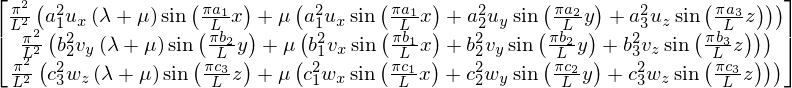

In [5]:
U = [u,v,w]
F = rho*dt(U) - navier(U)

simplify(F)

## References

- Malaya, Nicholas, et al. "MASA: a library for verification using manufactured and analytical solutions." Engineering with Computers 29.4 (2013): 487-496.

In [6]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()